# Linear Regression

In [67]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

EUR_VND

In [68]:
# Đọc dữ liệu
data = pd.read_csv('EUR_VND.csv') 
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
# data['Sale'] = data['Sale'].str.replace(',', '').astype(float)


# Sắp xếp dữ liệu theo thời gian
data = data.sort_values(by='Date')

7:3 EUR

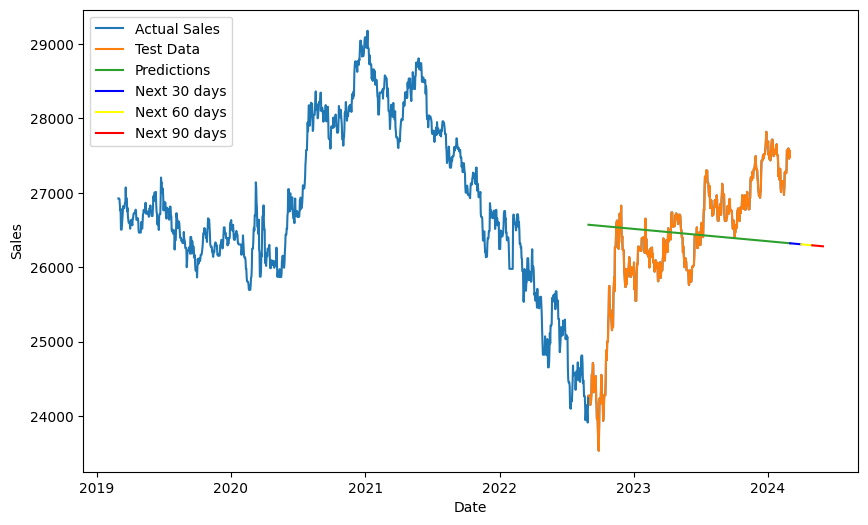

RMSE: 937.2114162414509
MAPE: 2.6872072697668234
MAE: 696.0153543314069


In [69]:
# Chia dữ liệu thành 7 phần train và 3 phần test
n = len(data)
train_size = int(0.7 * n)
train = data[:train_size]
test = data[train_size:]

# Xây dựng mô hình Linear Regression cho việc dự báo trước
model_before = LinearRegression()
model_before.fit(np.array(train.index).reshape(-1, 1), train['Sale'])

# Dự báo cho dữ liệu test
predictions_before = model_before.predict(np.array(test.index).reshape(-1, 1))

# Xây dựng mô hình Linear Regression cho việc dự báo sau chỉ trên tập huấn luyện
model_after = LinearRegression()
model_after.fit(np.array(train.index).reshape(-1, 1), train['Sale'])

# Dự đoán cho 30, 60, và 90 ngày tiếp theo sau phần kiểm tra
future_dates_30 = pd.date_range(start=test['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30)
future_index_30 = np.arange(test.index[-1] + 1, test.index[-1] + 31)
future_predictions_30 = model_after.predict(np.array(future_index_30).reshape(-1, 1))

future_dates_60 = pd.date_range(start=test['Date'].iloc[-1] + pd.Timedelta(days=31), periods=30)
future_index_60 = np.arange(test.index[-1] + 31, test.index[-1] + 61)
future_predictions_60 = model_after.predict(np.array(future_index_60).reshape(-1, 1))

future_dates_90 = pd.date_range(start=test['Date'].iloc[-1] + pd.Timedelta(days=61), periods=30)
future_index_90 = np.arange(test.index[-1] + 61, test.index[-1] + 91)
future_predictions_90 = model_after.predict(np.array(future_index_90).reshape(-1, 1))

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Sale'], label='Actual Sales')
plt.plot(test['Date'], test['Sale'], label='Test Data')
plt.plot(test['Date'], predictions_before, label='Predictions', linestyle='-')
plt.plot(future_dates_30, future_predictions_30, label='Next 30 days', linestyle='-', color='blue')
plt.plot(future_dates_60, future_predictions_60, label='Next 60 days', linestyle='-', color='yellow')
plt.plot(future_dates_90, future_predictions_90, label='Next 90 days', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# RMSE
rmse = np.sqrt(mean_squared_error(test['Sale'], predictions_before))
print("RMSE:", rmse)

# MAPE
mape = np.mean(np.abs((test['Sale'] - predictions_before) / test['Sale'])) * 100
print("MAPE:", mape)

# MAE
mae = mean_absolute_error(test['Sale'], predictions_before)
print("MAE:", mae)


8:2 EUR

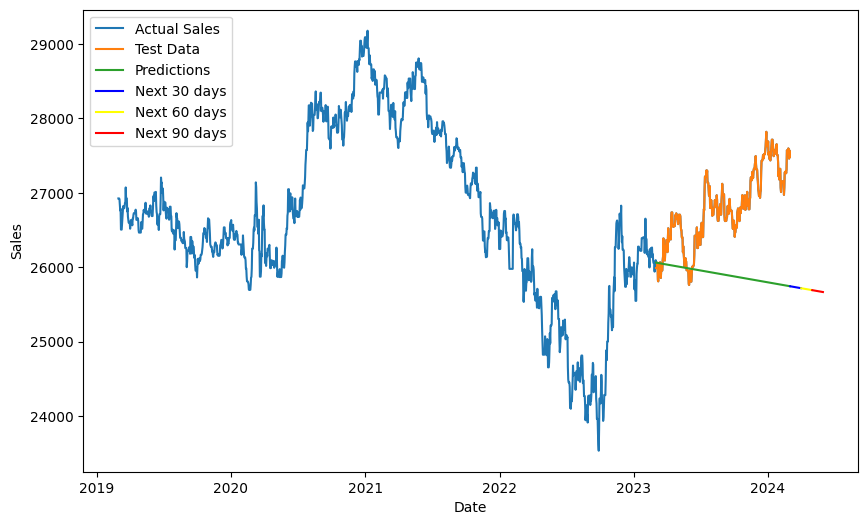

RMSE: 1057.561318406358
MAPE: 3.3340263015565705
MAE: 902.9723365905003


In [70]:
# Chia dữ liệu thành 7 phần train và 3 phần test
n = len(data)
train_size = int(0.8 * n)
train = data[:train_size]
test = data[train_size:]

# Xây dựng mô hình Linear Regression cho việc dự báo trước
model_before = LinearRegression()
model_before.fit(np.array(train.index).reshape(-1, 1), train['Sale'])

# Dự báo cho dữ liệu test
predictions_before = model_before.predict(np.array(test.index).reshape(-1, 1))

# Xây dựng mô hình Linear Regression cho việc dự báo sau chỉ trên tập huấn luyện
model_after = LinearRegression()
model_after.fit(np.array(train.index).reshape(-1, 1), train['Sale'])

# Dự đoán cho 30, 60, và 90 ngày tiếp theo sau phần kiểm tra
future_dates_30 = pd.date_range(start=test['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30)
future_index_30 = np.arange(test.index[-1] + 1, test.index[-1] + 31)
future_predictions_30 = model_after.predict(np.array(future_index_30).reshape(-1, 1))

future_dates_60 = pd.date_range(start=test['Date'].iloc[-1] + pd.Timedelta(days=31), periods=30)
future_index_60 = np.arange(test.index[-1] + 31, test.index[-1] + 61)
future_predictions_60 = model_after.predict(np.array(future_index_60).reshape(-1, 1))

future_dates_90 = pd.date_range(start=test['Date'].iloc[-1] + pd.Timedelta(days=61), periods=30)
future_index_90 = np.arange(test.index[-1] + 61, test.index[-1] + 91)
future_predictions_90 = model_after.predict(np.array(future_index_90).reshape(-1, 1))

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Sale'], label='Actual Sales')
plt.plot(test['Date'], test['Sale'], label='Test Data')
plt.plot(test['Date'], predictions_before, label='Predictions', linestyle='-')
plt.plot(future_dates_30, future_predictions_30, label='Next 30 days', linestyle='-', color='blue')
plt.plot(future_dates_60, future_predictions_60, label='Next 60 days', linestyle='-', color='yellow')
plt.plot(future_dates_90, future_predictions_90, label='Next 90 days', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# RMSE
rmse = np.sqrt(mean_squared_error(test['Sale'], predictions_before))
print("RMSE:", rmse)

# MAPE
mape = np.mean(np.abs((test['Sale'] - predictions_before) / test['Sale'])) * 100
print("MAPE:", mape)

# MAE
mae = mean_absolute_error(test['Sale'], predictions_before)
print("MAE:", mae)


9:1 EUR

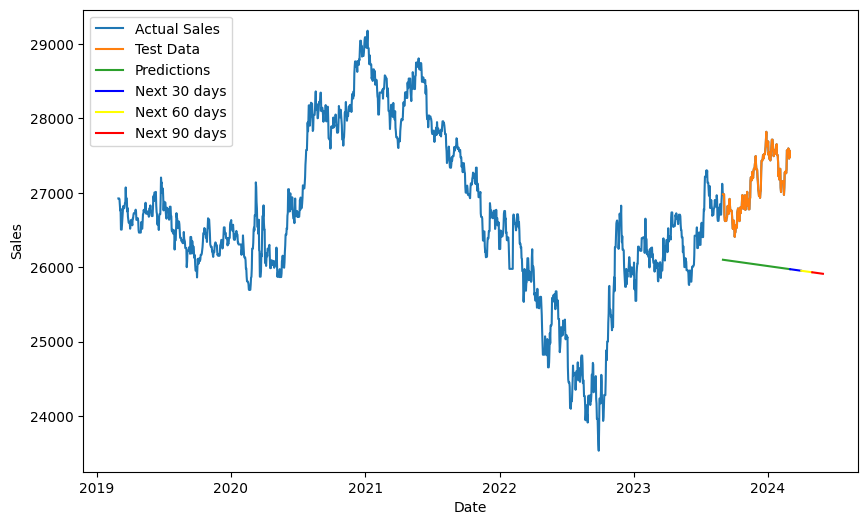

RMSE: 1152.5917872168814
MAPE: 3.9806936196247484
MAE: 1084.6356437702518


In [71]:
# Chia dữ liệu thành 7 phần train và 3 phần test
n = len(data)
train_size = int(0.9 * n)
train = data[:train_size]
test = data[train_size:]

# Xây dựng mô hình Linear Regression cho việc dự báo trước
model_before = LinearRegression()
model_before.fit(np.array(train.index).reshape(-1, 1), train['Sale'])

# Dự báo cho dữ liệu test
predictions_before = model_before.predict(np.array(test.index).reshape(-1, 1))

# Xây dựng mô hình Linear Regression cho việc dự báo sau chỉ trên tập huấn luyện
model_after = LinearRegression()
model_after.fit(np.array(train.index).reshape(-1, 1), train['Sale'])

# Dự đoán cho 30, 60, và 90 ngày tiếp theo sau phần kiểm tra
future_dates_30 = pd.date_range(start=test['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30)
future_index_30 = np.arange(test.index[-1] + 1, test.index[-1] + 31)
future_predictions_30 = model_after.predict(np.array(future_index_30).reshape(-1, 1))

future_dates_60 = pd.date_range(start=test['Date'].iloc[-1] + pd.Timedelta(days=31), periods=30)
future_index_60 = np.arange(test.index[-1] + 31, test.index[-1] + 61)
future_predictions_60 = model_after.predict(np.array(future_index_60).reshape(-1, 1))

future_dates_90 = pd.date_range(start=test['Date'].iloc[-1] + pd.Timedelta(days=61), periods=30)
future_index_90 = np.arange(test.index[-1] + 61, test.index[-1] + 91)
future_predictions_90 = model_after.predict(np.array(future_index_90).reshape(-1, 1))

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Sale'], label='Actual Sales')
plt.plot(test['Date'], test['Sale'], label='Test Data')
plt.plot(test['Date'], predictions_before, label='Predictions', linestyle='-')
plt.plot(future_dates_30, future_predictions_30, label='Next 30 days', linestyle='-', color='blue')
plt.plot(future_dates_60, future_predictions_60, label='Next 60 days', linestyle='-', color='yellow')
plt.plot(future_dates_90, future_predictions_90, label='Next 90 days', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


# RMSE
rmse = np.sqrt(mean_squared_error(test['Sale'], predictions_before))
print("RMSE:", rmse)

# MAPE
mape = np.mean(np.abs((test['Sale'] - predictions_before) / test['Sale'])) * 100
print("MAPE:", mape)

# MAE
mae = mean_absolute_error(test['Sale'], predictions_before)
print("MAE:", mae)


GBP_VND

In [72]:
# Đọc dữ liệu mới
data_1 = pd.read_csv('GBP_VND.csv') 
data_1['Date'] = pd.to_datetime(data_1['Date'], format='%d/%m/%Y')
# data_1['Sale'] = data_1['Sale'].str.replace(',', '').astype(float)

# Sắp xếp dữ liệu theo thời gian
data_1 = data_1.sort_values(by='Date')

7:3 GBP

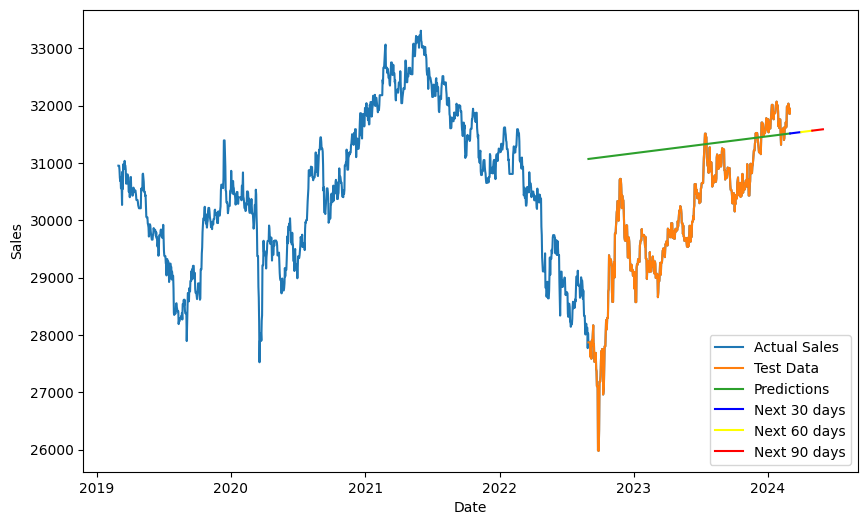

RMSE: 1625.4124742620938
MAPE: 4.390274212216578
MAE: 1277.9080565466472


In [73]:
# Chia dữ liệu thành 7 phần train và 3 phần test
n_1 = len(data_1)
train_size_1 = int(0.7 * n_1)
train_1 = data_1[:train_size_1]
test_1 = data_1[train_size_1:]

# Xây dựng mô hình Linear Regression cho việc dự báo trước
model_before_1 = LinearRegression()
model_before_1.fit(np.array(train_1.index).reshape(-1, 1), train_1['Sale'])

# Dự báo cho dữ liệu test
predictions_before_1 = model_before_1.predict(np.array(test_1.index).reshape(-1, 1))

# Xây dựng mô hình Linear Regression cho việc dự báo sau chỉ trên tập huấn luyện
model_after_1 = LinearRegression()
model_after_1.fit(np.array(train_1.index).reshape(-1, 1), train_1['Sale'])

# Dự đoán cho 30, 60, và 90 ngày tiếp theo sau phần kiểm tra
future_dates_30_1 = pd.date_range(start=test_1['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30)
future_index_30_1 = np.arange(test_1.index[-1] + 1, test_1.index[-1] + 31)
future_predictions_30_1 = model_after_1.predict(np.array(future_index_30_1).reshape(-1, 1))

future_dates_60_1 = pd.date_range(start=test_1['Date'].iloc[-1] + pd.Timedelta(days=31), periods=30)
future_index_60_1 = np.arange(test_1.index[-1] + 31, test_1.index[-1] + 61)
future_predictions_60_1 = model_after_1.predict(np.array(future_index_60_1).reshape(-1, 1))

future_dates_90_1 = pd.date_range(start=test_1['Date'].iloc[-1] + pd.Timedelta(days=61), periods=30)
future_index_90_1 = np.arange(test_1.index[-1] + 61, test_1.index[-1] + 91)
future_predictions_90_1 = model_after_1.predict(np.array(future_index_90_1).reshape(-1, 1))

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(data_1['Date'], data_1['Sale'], label='Actual Sales')
plt.plot(test_1['Date'], test_1['Sale'], label='Test Data')
plt.plot(test_1['Date'], predictions_before_1, label='Predictions', linestyle='-')
plt.plot(future_dates_30_1, future_predictions_30_1, label='Next 30 days', linestyle='-', color='blue')
plt.plot(future_dates_60_1, future_predictions_60_1, label='Next 60 days', linestyle='-', color='yellow')
plt.plot(future_dates_90_1, future_predictions_90_1, label='Next 90 days', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


# RMSE
rmse_1 = np.sqrt(mean_squared_error(test_1['Sale'], predictions_before_1))
print("RMSE:", rmse_1)

# MAPE
mape_1 = np.mean(np.abs((test_1['Sale'] - predictions_before_1) / test_1['Sale'])) * 100
print("MAPE:", mape_1)

# MAE
mae_1 = mean_absolute_error(test_1['Sale'], predictions_before_1)
print("MAE:", mae_1)


8:2 GBP

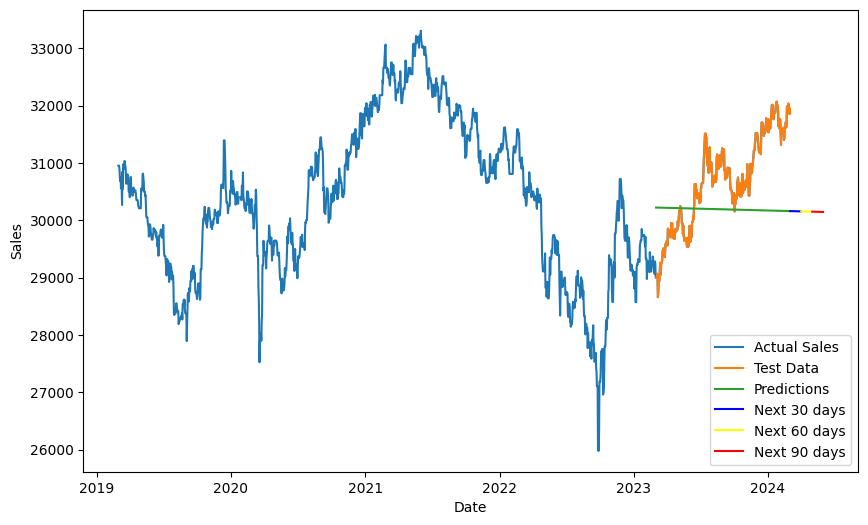

RMSE: 950.1073758432289
MAPE: 2.597602958849699
MAE: 804.7004326533614


In [74]:
# Chia dữ liệu thành 7 phần train và 3 phần test
n_1 = len(data_1)
train_size_1 = int(0.8 * n_1)
train_1 = data_1[:train_size_1]
test_1 = data_1[train_size_1:]

# Xây dựng mô hình Linear Regression cho việc dự báo trước
model_before_1 = LinearRegression()
model_before_1.fit(np.array(train_1.index).reshape(-1, 1), train_1['Sale'])

# Dự báo cho dữ liệu test
predictions_before_1 = model_before_1.predict(np.array(test_1.index).reshape(-1, 1))

# Xây dựng mô hình Linear Regression cho việc dự báo sau chỉ trên tập huấn luyện
model_after_1 = LinearRegression()
model_after_1.fit(np.array(train_1.index).reshape(-1, 1), train_1['Sale'])

# Dự đoán cho 30, 60, và 90 ngày tiếp theo sau phần kiểm tra
future_dates_30_1 = pd.date_range(start=test_1['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30)
future_index_30_1 = np.arange(test_1.index[-1] + 1, test_1.index[-1] + 31)
future_predictions_30_1 = model_after_1.predict(np.array(future_index_30_1).reshape(-1, 1))

future_dates_60_1 = pd.date_range(start=test_1['Date'].iloc[-1] + pd.Timedelta(days=31), periods=30)
future_index_60_1 = np.arange(test_1.index[-1] + 31, test_1.index[-1] + 61)
future_predictions_60_1 = model_after_1.predict(np.array(future_index_60_1).reshape(-1, 1))

future_dates_90_1 = pd.date_range(start=test_1['Date'].iloc[-1] + pd.Timedelta(days=61), periods=30)
future_index_90_1 = np.arange(test_1.index[-1] + 61, test_1.index[-1] + 91)
future_predictions_90_1 = model_after_1.predict(np.array(future_index_90_1).reshape(-1, 1))

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(data_1['Date'], data_1['Sale'], label='Actual Sales')
plt.plot(test_1['Date'], test_1['Sale'], label='Test Data')
plt.plot(test_1['Date'], predictions_before_1, label='Predictions', linestyle='-')
plt.plot(future_dates_30_1, future_predictions_30_1, label='Next 30 days', linestyle='-', color='blue')
plt.plot(future_dates_60_1, future_predictions_60_1, label='Next 60 days', linestyle='-', color='yellow')
plt.plot(future_dates_90_1, future_predictions_90_1, label='Next 90 days', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


# RMSE
rmse_1 = np.sqrt(mean_squared_error(test_1['Sale'], predictions_before_1))
print("RMSE:", rmse_1)

# MAPE
mape_1 = np.mean(np.abs((test_1['Sale'] - predictions_before_1) / test_1['Sale'])) * 100
print("MAPE:", mape_1)

# MAE
mae_1 = mean_absolute_error(test_1['Sale'], predictions_before_1)
print("MAE:", mae_1)


9:1 GBP

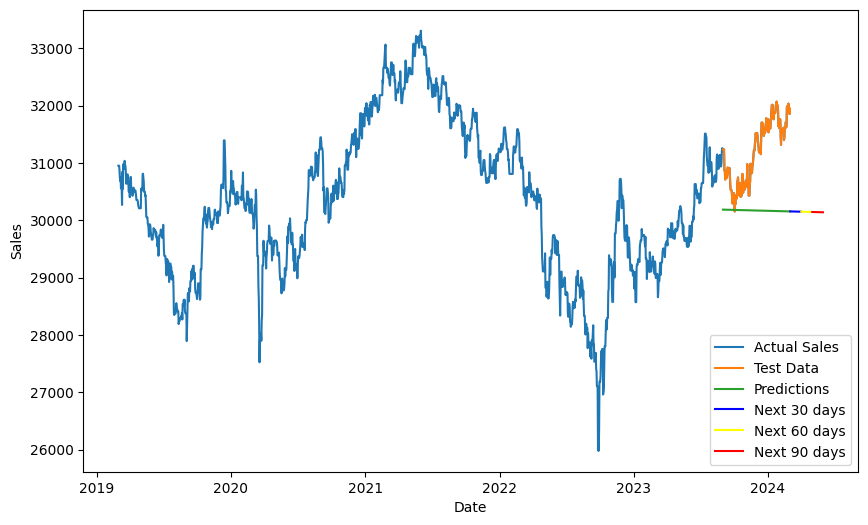

RMSE: 1165.593398168883
MAPE: 3.259805867518107
MAE: 1026.2636594498988


In [75]:
# Chia dữ liệu thành 7 phần train và 3 phần test
n_1 = len(data_1)
train_size_1 = int(0.9 * n_1)
train_1 = data_1[:train_size_1]
test_1 = data_1[train_size_1:]

# Xây dựng mô hình Linear Regression cho việc dự báo trước
model_before_1 = LinearRegression()
model_before_1.fit(np.array(train_1.index).reshape(-1, 1), train_1['Sale'])

# Dự báo cho dữ liệu test
predictions_before_1 = model_before_1.predict(np.array(test_1.index).reshape(-1, 1))

# Xây dựng mô hình Linear Regression cho việc dự báo sau chỉ trên tập huấn luyện
model_after_1 = LinearRegression()
model_after_1.fit(np.array(train_1.index).reshape(-1, 1), train_1['Sale'])

# Dự đoán cho 30, 60, và 90 ngày tiếp theo sau phần kiểm tra
future_dates_30_1 = pd.date_range(start=test_1['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30)
future_index_30_1 = np.arange(test_1.index[-1] + 1, test_1.index[-1] + 31)
future_predictions_30_1 = model_after_1.predict(np.array(future_index_30_1).reshape(-1, 1))

future_dates_60_1 = pd.date_range(start=test_1['Date'].iloc[-1] + pd.Timedelta(days=31), periods=30)
future_index_60_1 = np.arange(test_1.index[-1] + 31, test_1.index[-1] + 61)
future_predictions_60_1 = model_after_1.predict(np.array(future_index_60_1).reshape(-1, 1))

future_dates_90_1 = pd.date_range(start=test_1['Date'].iloc[-1] + pd.Timedelta(days=61), periods=30)
future_index_90_1 = np.arange(test_1.index[-1] + 61, test_1.index[-1] + 91)
future_predictions_90_1 = model_after_1.predict(np.array(future_index_90_1).reshape(-1, 1))

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(data_1['Date'], data_1['Sale'], label='Actual Sales')
plt.plot(test_1['Date'], test_1['Sale'], label='Test Data')
plt.plot(test_1['Date'], predictions_before_1, label='Predictions', linestyle='-')
plt.plot(future_dates_30_1, future_predictions_30_1, label='Next 30 days', linestyle='-', color='blue')
plt.plot(future_dates_60_1, future_predictions_60_1, label='Next 60 days', linestyle='-', color='yellow')
plt.plot(future_dates_90_1, future_predictions_90_1, label='Next 90 days', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


# RMSE
rmse_1 = np.sqrt(mean_squared_error(test_1['Sale'], predictions_before_1))
print("RMSE:", rmse_1)

# MAPE
mape_1 = np.mean(np.abs((test_1['Sale'] - predictions_before_1) / test_1['Sale'])) * 100
print("MAPE:", mape_1)

# MAE
mae_1 = mean_absolute_error(test_1['Sale'], predictions_before_1)
print("MAE:", mae_1)


JPY_VND

In [76]:
# Đọc dữ liệu mới
data_2 = pd.read_csv('JPY_VND.csv') 
data_2['Date'] = pd.to_datetime(data_2['Date'], format='%d/%m/%Y')
# data_2['Sale'] = data_2['Sale'].str.replace(',', '').astype(float)

# Sắp xếp dữ liệu theo thời gian
data_2 = data_2.sort_values(by='Date')

7:3 JPY

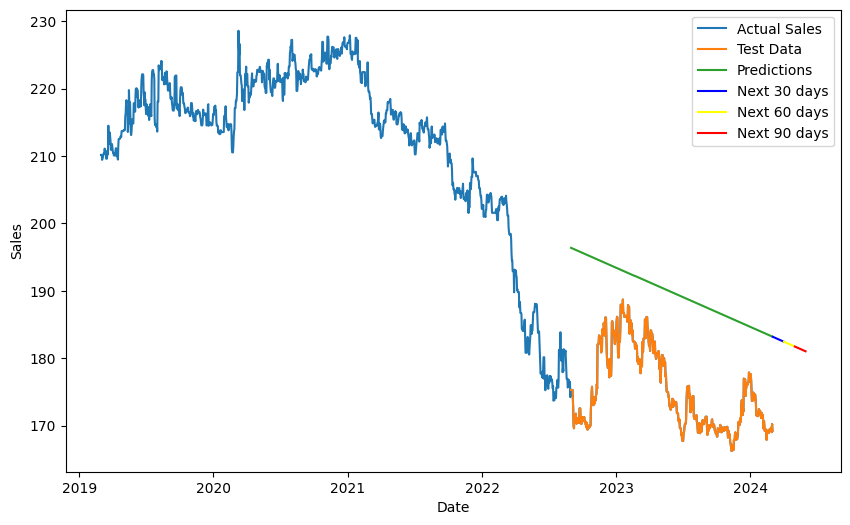

RMSE: 15.557890094922861
MAPE: 8.459629329906972
MAE: 14.66536769740793


In [77]:
# Chia dữ liệu thành 7 phần train và 3 phần test
n_2 = len(data_2)
train_size_2 = int(0.7 * n_2)
train_2 = data_2[:train_size_2]
test_2 = data_2[train_size_2:]

# Xây dựng mô hình Linear Regression cho việc dự báo trước
model_before_2 = LinearRegression()
model_before_2.fit(np.array(train_2.index).reshape(-1, 1), train_2['Sale'])

# Dự báo cho dữ liệu test
predictions_before_2 = model_before_2.predict(np.array(test_2.index).reshape(-1, 1))

# Xây dựng mô hình Linear Regression cho việc dự báo sau chỉ trên tập huấn luyện
model_after_2 = LinearRegression()
model_after_2.fit(np.array(train_2.index).reshape(-1, 1), train_2['Sale'])

# Dự đoán cho 30, 60, và 90 ngày tiếp theo sau phần kiểm tra
future_dates_30_2 = pd.date_range(start=test_2['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30)
future_index_30_2 = np.arange(test_2.index[-1] + 1, test_2.index[-1] + 31)
future_predictions_30_2 = model_after_2.predict(np.array(future_index_30_2).reshape(-1, 1))

future_dates_60_2 = pd.date_range(start=test_2['Date'].iloc[-1] + pd.Timedelta(days=31), periods=30)
future_index_60_2 = np.arange(test_2.index[-1] + 31, test_2.index[-1] + 61)
future_predictions_60_2 = model_after_2.predict(np.array(future_index_60_2).reshape(-1, 1))

future_dates_90_2 = pd.date_range(start=test_2['Date'].iloc[-1] + pd.Timedelta(days=61), periods=30)
future_index_90_2 = np.arange(test_2.index[-1] + 61, test_2.index[-1] + 91)
future_predictions_90_2 = model_after_2.predict(np.array(future_index_90_2).reshape(-1, 1))

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(data_2['Date'], data_2['Sale'], label='Actual Sales')
plt.plot(test_2['Date'], test_2['Sale'], label='Test Data')
plt.plot(test_2['Date'], predictions_before_2, label='Predictions', linestyle='-')
plt.plot(future_dates_30_2, future_predictions_30_2, label='Next 30 days', linestyle='-', color='blue')
plt.plot(future_dates_60_2, future_predictions_60_2, label='Next 60 days', linestyle='-', color='yellow')
plt.plot(future_dates_90_2, future_predictions_90_2, label='Next 90 days', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


# RMSE
rmse_2 = np.sqrt(mean_squared_error(test_2['Sale'], predictions_before_2))
print("RMSE:", rmse_2)

# MAPE
mape_2 = np.mean(np.abs((test_2['Sale'] - predictions_before_2) / test_2['Sale'])) * 100
print("MAPE:", mape_2)

# MAE
mae_2 = mean_absolute_error(test_2['Sale'], predictions_before_2)
print("MAE:", mae_2)


8:2 JPY

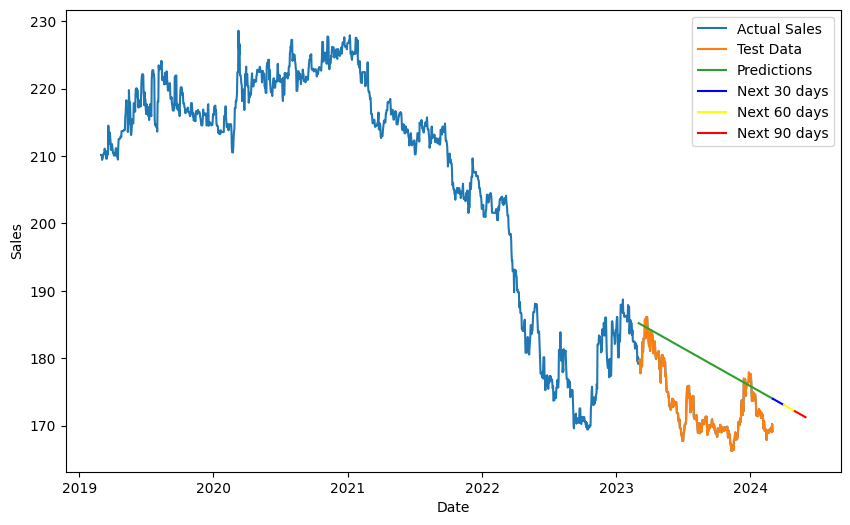

RMSE: 7.389819237935845
MAPE: 3.7905624399168976
MAE: 6.491338965096282


In [78]:
# Chia dữ liệu thành 7 phần train và 3 phần test
n_2 = len(data_2)
train_size_2 = int(0.8 * n_2)
train_2 = data_2[:train_size_2]
test_2 = data_2[train_size_2:]

# Xây dựng mô hình Linear Regression cho việc dự báo trước
model_before_2 = LinearRegression()
model_before_2.fit(np.array(train_2.index).reshape(-1, 1), train_2['Sale'])

# Dự báo cho dữ liệu test
predictions_before_2 = model_before_2.predict(np.array(test_2.index).reshape(-1, 1))

# Xây dựng mô hình Linear Regression cho việc dự báo sau chỉ trên tập huấn luyện
model_after_2 = LinearRegression()
model_after_2.fit(np.array(train_2.index).reshape(-1, 1), train_2['Sale'])

# Dự đoán cho 30, 60, và 90 ngày tiếp theo sau phần kiểm tra
future_dates_30_2 = pd.date_range(start=test_2['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30)
future_index_30_2 = np.arange(test_2.index[-1] + 1, test_2.index[-1] + 31)
future_predictions_30_2 = model_after_2.predict(np.array(future_index_30_2).reshape(-1, 1))

future_dates_60_2 = pd.date_range(start=test_2['Date'].iloc[-1] + pd.Timedelta(days=31), periods=30)
future_index_60_2 = np.arange(test_2.index[-1] + 31, test_2.index[-1] + 61)
future_predictions_60_2 = model_after_2.predict(np.array(future_index_60_2).reshape(-1, 1))

future_dates_90_2 = pd.date_range(start=test_2['Date'].iloc[-1] + pd.Timedelta(days=61), periods=30)
future_index_90_2 = np.arange(test_2.index[-1] + 61, test_2.index[-1] + 91)
future_predictions_90_2 = model_after_2.predict(np.array(future_index_90_2).reshape(-1, 1))

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(data_2['Date'], data_2['Sale'], label='Actual Sales')
plt.plot(test_2['Date'], test_2['Sale'], label='Test Data')
plt.plot(test_2['Date'], predictions_before_2, label='Predictions', linestyle='-')
plt.plot(future_dates_30_2, future_predictions_30_2, label='Next 30 days', linestyle='-', color='blue')
plt.plot(future_dates_60_2, future_predictions_60_2, label='Next 60 days', linestyle='-', color='yellow')
plt.plot(future_dates_90_2, future_predictions_90_2, label='Next 90 days', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


# RMSE
rmse_2 = np.sqrt(mean_squared_error(test_2['Sale'], predictions_before_2))
print("RMSE:", rmse_2)

# MAPE
mape_2 = np.mean(np.abs((test_2['Sale'] - predictions_before_2) / test_2['Sale'])) * 100
print("MAPE:", mape_2)

# MAE
mae_2 = mean_absolute_error(test_2['Sale'], predictions_before_2)
print("MAE:", mae_2)


9:1 JPY

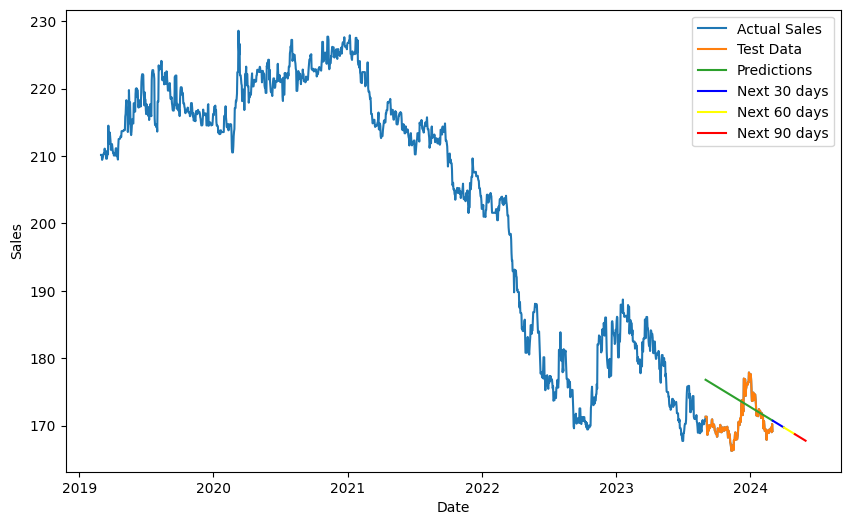

RMSE: 4.749180284583805
MAPE: 2.3993643993785763
MAE: 4.077729900233016


In [79]:
# Chia dữ liệu thành 7 phần train và 3 phần test
n_2 = len(data_2)
train_size_2 = int(0.9 * n_2)
train_2 = data_2[:train_size_2]
test_2 = data_2[train_size_2:]

# Xây dựng mô hình Linear Regression cho việc dự báo trước
model_before_2 = LinearRegression()
model_before_2.fit(np.array(train_2.index).reshape(-1, 1), train_2['Sale'])

# Dự báo cho dữ liệu test
predictions_before_2 = model_before_2.predict(np.array(test_2.index).reshape(-1, 1))

# Xây dựng mô hình Linear Regression cho việc dự báo sau chỉ trên tập huấn luyện
model_after_2 = LinearRegression()
model_after_2.fit(np.array(train_2.index).reshape(-1, 1), train_2['Sale'])

# Dự đoán cho 30, 60, và 90 ngày tiếp theo sau phần kiểm tra
future_dates_30_2 = pd.date_range(start=test_2['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30)
future_index_30_2 = np.arange(test_2.index[-1] + 1, test_2.index[-1] + 31)
future_predictions_30_2 = model_after_2.predict(np.array(future_index_30_2).reshape(-1, 1))

future_dates_60_2 = pd.date_range(start=test_2['Date'].iloc[-1] + pd.Timedelta(days=31), periods=30)
future_index_60_2 = np.arange(test_2.index[-1] + 31, test_2.index[-1] + 61)
future_predictions_60_2 = model_after_2.predict(np.array(future_index_60_2).reshape(-1, 1))

future_dates_90_2 = pd.date_range(start=test_2['Date'].iloc[-1] + pd.Timedelta(days=61), periods=30)
future_index_90_2 = np.arange(test_2.index[-1] + 61, test_2.index[-1] + 91)
future_predictions_90_2 = model_after_2.predict(np.array(future_index_90_2).reshape(-1, 1))

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(data_2['Date'], data_2['Sale'], label='Actual Sales')
plt.plot(test_2['Date'], test_2['Sale'], label='Test Data')
plt.plot(test_2['Date'], predictions_before_2, label='Predictions', linestyle='-')
plt.plot(future_dates_30_2, future_predictions_30_2, label='Next 30 days', linestyle='-', color='blue')
plt.plot(future_dates_60_2, future_predictions_60_2, label='Next 60 days', linestyle='-', color='yellow')
plt.plot(future_dates_90_2, future_predictions_90_2, label='Next 90 days', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


# RMSE
rmse_2 = np.sqrt(mean_squared_error(test_2['Sale'], predictions_before_2))
print("RMSE:", rmse_2)

# MAPE
mape_2 = np.mean(np.abs((test_2['Sale'] - predictions_before_2) / test_2['Sale'])) * 100
print("MAPE:", mape_2)

# MAE
mae_2 = mean_absolute_error(test_2['Sale'], predictions_before_2)
print("MAE:", mae_2)
